### Test Code for Module LogReg

In [1]:
include("script.jl")
import .LogReg

In [2]:
import Plots
import Random

In [3]:
# generate linearly separated random data
X_data = Random.rand(0.0:0.01:10.0, (200, 2)) # first column X-axis, second column Y-axis
Y_data = Array{Int64}(undef, size(X_data)[1])
linear_func(x) = 2 * x - 3
for i = 1:size(X_data)[1]
    if X_data[i, 2] > linear_func(X_data[i, 1]) + randn()*2
        Y_data[i] = 0
    else
        Y_data[i] = 1
    end
end
println("Shape of X_data: ", size(X_data))
println("Shape of Y_data: ", size(Y_data))

Shape of X_data: (200, 2)
Shape of Y_data: (200,)


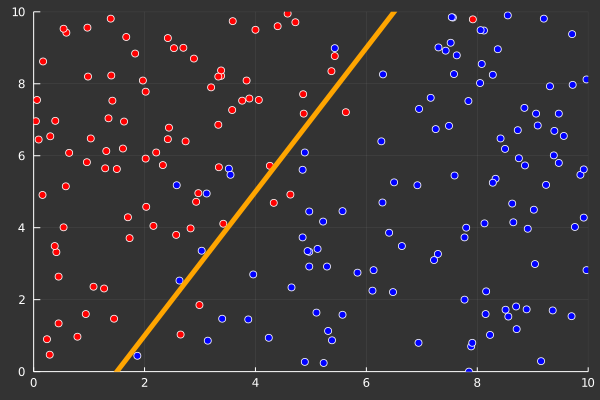

In [4]:
# plot the data
plot_X1 = [X_data[i, 1] for i in 1:(size(X_data)[1]) if Y_data[i] == 0]
plot_Y1 = [X_data[i, 2] for i in 1:(size(X_data)[1]) if Y_data[i] == 0]
plot_X2 = [X_data[i, 1] for i in 1:(size(X_data)[1]) if Y_data[i] == 1]
plot_Y2 = [X_data[i, 2] for i in 1:(size(X_data)[1]) if Y_data[i] == 1]
plot_X3 = [i for i in 0:10]
plot_Y3 = [linear_func(m) for m in plot_X3]
Plots.gr()
Plots.scatter(plot_X1, plot_Y1, leg=false, c="red", background_color=Plots.RGB(0.2, 0.2, 0.2))
Plots.scatter!(plot_X2, plot_Y2, leg=false, c="blue")
Plots.plot!(plot_X3, plot_Y3, leg=false, c="orange", linewidth=5)
Plots.xlims!((0.0, 10.0))
Plots.ylims!((0.0, 10.0))

In [5]:
# run logistic regression
weights = LogReg.train(X_data, Y_data, learning_rate=0.01, max_iter=10)
predictions = LogReg.predict(X_data, weights)
println("Accuracy: ", LogReg.accuracy(predictions, Y_data))

Accuracy: 0.115


In [6]:
# increase iteractions
weights = LogReg.train(X_data, Y_data, learning_rate=0.01, max_iter=100)
predictions = LogReg.predict(X_data, weights)
println("Accuracy: ", LogReg.accuracy(predictions, Y_data))

Accuracy: 0.915


In [7]:
# increase iteractions
weights = LogReg.train(X_data, Y_data, learning_rate=0.01, max_iter=1000)
predictions = LogReg.predict(X_data, weights)
println("Accuracy: ", LogReg.accuracy(predictions, Y_data))

Accuracy: 0.94


In [8]:
# increase iteractions
weights = LogReg.train(X_data, Y_data, learning_rate=0.01, max_iter=10000)
predictions = LogReg.predict(X_data, weights)
println("Accuracy: ", LogReg.accuracy(predictions, Y_data))

Accuracy: 0.945


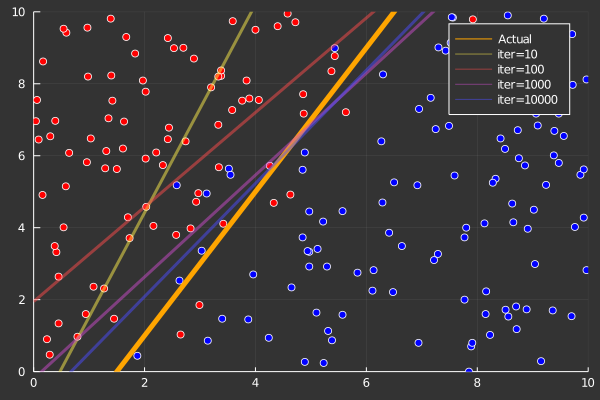

In [9]:
# plot comparison graph
Plots.gr()
Plots.scatter(plot_X1, plot_Y1, c="red", background_color=Plots.RGB(0.2, 0.2, 0.2), label="")
Plots.scatter!(plot_X2, plot_Y2, c="blue", label="")
Plots.plot!(plot_X3, plot_Y3, c="orange", linewidth=5, label="Actual")
accuracy = Array{Float64}(undef, 4)
for (i, iternum) in enumerate([10, 100, 1000, 10000])
    weights = LogReg.train(X_data, Y_data, learning_rate=0.01, max_iter=iternum)
    accuracy[i] = LogReg.accuracy(LogReg.predict(X_data, weights), Y_data)
    @assert size(weights)[1] == 3
    plot_Y3_ = -(weights[3] .+ (weights[1] .* plot_X3)) ./ weights[2]
    Plots.plot!(plot_X3, plot_Y3_, palette=:lightrainbow, linewidth=3, label="iter=$iternum", alpha=0.5)
end
Plots.xlims!((0.0, 10.0))
Plots.ylims!((0.0, 10.0))

In [10]:
println("Accuracys are: ", accuracy)

Accuracys are: [0.835, 0.86, 0.93, 0.94]
